In [181]:
 %matplotlib inline

In [182]:
#Task 1: creating a scoring algorithm using ratings and votes

import pandas as pd
#imported data to a dataframe
df = pd.read_csv("2020-XTern-DS.csv")
#subsetted the data to only restaurants with votes
df1 = df[df.Votes.apply(lambda x: x.isnumeric())]
#created a new dataframe with only ratings and votes
df2 = df1[["Rating", "Votes"]]
#converted ratings and votes into floats to be manipulated 
df2["Rating"] = df2["Rating"].astype(float)
df2["Votes"] = df2["Votes"].astype(float)
#made a new column which was a fraction of "Votes" to combine with ratings for a scoring algorithm 
df2["Vote"] = df2.Votes.div(100)
#got rid of the "Votes" dataframe so that it wouldn't be used to calculate score
df2 = df2[["Rating", "Vote"]]
#Creates a column which is the scoring algorithm I created with ratings and votes combined 
df1["Score"] = df2.sum(axis = 1)
#Sorts the dataframe by "Score" so that the highest scores appear at the top
df1 = df1.sort_values(by = "Score", ascending = False)
#returns the top 5 scores according to the scoring algorithm I created
df1.head()

#Conclusion: The 5 most trending restaurants according to the scoring algorithm I made combining ratings with number of votes is shown below.
#The top 5 restuarant ID's are: ID_1064, ID_1666, ID_2885, ID_2601, ID_6511

/opt/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

,Restaurant,Latitude,Longitude,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Cook_Time,Score
1180,ID_1064,39.587777,-85.564805,"Continental, North Indian, BBQ, Steak",$80.00,$50.00,4.7,9054,6504,45 minutes,95.24
1300,ID_1666,39.959980,-85.903329,"Mexican, American, Italian, Burger",$50.00,$99.00,4.6,4903,3989,65 minutes,53.63
123,ID_2885,39.543546,-85.186797,"German, Italian, Cafe",$45.00,$50.00,4.3,4691,2547,45 minutes,51.21
1780,ID_2601,39.560512,-85.826137,"Bakery, Desserts, Sandwich",$15.00,$50.00,4.1,4606,2311,45 minutes,50.16
1796,ID_6511,39.199394,-85.529664,"Street Food, Beverages",$10.00,$50.00,3.9,4438,2576,45 minutes,48.28


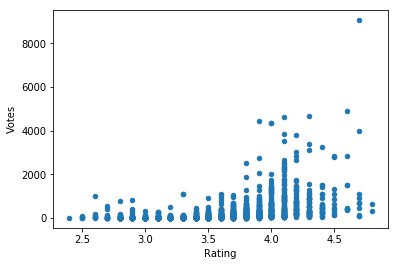

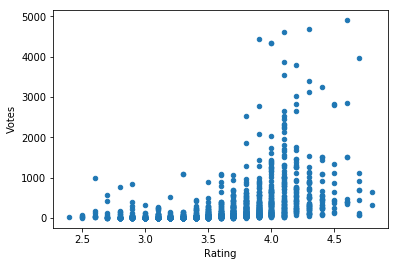

In [183]:
#Task 2: Plotting Rating vs Votes

#Converting ratings to floats and votes to integers so that it can be plotted
df1["Rating"] = df1["Rating"].astype(float)
df1["Votes"] = df1["Votes"].astype(int)
#Create a scatterplot to plot the relationship
df1.plot.scatter(x = "Rating", y = "Votes")
#Data was zoomed out very far so I removed an extreme value for a more detailed plot
df1 = df1.drop([1180])
#Plot the relationship again without the extreme value
df1.plot.scatter(x = "Rating", y = "Votes")

#Conclusion: There is a moderately strong linear relationship between the rating received and the number of votes. 

In [184]:
#Task 3: Which type of cuisine gets the highest ratings?

#Filtered dataframe by votes to remove rows with no ratings/votes
df3 = df[df.Votes.apply(lambda x: x.isnumeric())]
#Sorted the dataframe by ranting
df3 = df3.sort_values(by = "Rating", ascending = False)
#Converted Rating to float to get highest ratings
df3["Rating"] = df3["Rating"].astype(float)
#Subset the dataframe to get the highest rated restaurants
HighRated = df3[df3.Rating >= 4.7]
#Print the highest rated restaurants to see if any cuisines appear often
print(HighRated)
#After viewing the "HighestRated" dataframe I saw that "North Indian" cuisine appeared often so I made a new datafram with the highest rated containing this cuisine.
NorthIndian = HighRated[HighRated.Cuisines.str.contains('North Indian')]
#Number of rows in HighRated
print(len(HighRated))
#Number of rows in NorthIndian to see what porportion of highest rated was of that cuisine
print(len(NorthIndian))

#Conclusion: North Indian cuisine is the most liked cuisine by far with the highest ratings.
#8 out of 12 (66.67%) of the restaurants with ratings of 4.7 or above served North Indian cuisine.

     Restaurant   Latitude  Longitude  \
169     ID_7412  39.382427 -85.499864   
1325    ID_4728  39.135109 -85.830490   
446     ID_1166  39.915714 -85.847807   
144     ID_6537  39.338426 -85.052456   
1428    ID_2051  39.759886 -85.500507   
225     ID_6278  39.225163 -85.958715   
325      ID_383  39.126168 -85.108334   
1803    ID_2201  39.406153 -85.929083   
35      ID_1160  39.246289 -85.152915   
1501    ID_7924  39.541385 -85.588979   
1180    ID_1064  39.587777 -85.564805   
1949    ID_1166  39.599674 -85.444582   

                                               Cuisines Average_Cost  \
169                        North Indian, Chinese, Rolls       $15.00   
1325       North Indian, Mughlai, Biryani, Rolls, Momos       $25.00   
446                                        North Indian       $30.00   
144        Biryani, North Indian, Mughlai, Kebab, Rolls       $25.00   
1428  Italian, Continental, Chinese, Mexican, Fast F...       $30.00   
225                               

In [185]:
#Task 4: Which cuisines cost the most money?

#Used regular expressions to convert average cost to float so it could be sorted
df["Average_Cost"] = df["Average_Cost"].replace('[\$,]', '', regex=True).astype(float)
#Sorted by Average_Cost
df4 = df.sort_values(by = "Average_Cost", ascending = False)
#Printed df4 to look for expensive cuisines
print(df4)
#Found five cuisines that appeared near the most expensive to analyze further and subsetted them into their own dataframes
Cantonese = df4[df4.Cuisines.str.contains("Cantonese")]
Japanese = df4[df4.Cuisines.str.contains("Japanese")]
Sushi = df4[df4.Cuisines.str.contains("Sushi")]
Mediterranean = df4[df4.Cuisines.str.contains("Mediterranean")]
European = df4[df4.Cuisines.str.contains("European")]
#Printed the mean of the average cost column of each of the 5 cuisines
print(Cantonese.Average_Cost.mean())
print(Japanese.Average_Cost.mean())
print(Sushi.Average_Cost.mean())
print(Mediterranean.Average_Cost.mean())
print(European.Average_Cost.mean())

#Conclusion: Cantonese cuisine is the most expensive cuisine, followed by European cuisine.
#Cantonese cuisine on average costs $100 and European cuisine costs $55.38

     Restaurant   Latitude  Longitude  \
2018    ID_8403  39.460944 -85.484355   
1296    ID_2545  39.330834 -85.806831   
822     ID_8117  39.391951 -85.076733   
225     ID_6278  39.225163 -85.958715   
1459    ID_3192  39.846970 -85.624772   
683     ID_5879  39.416346 -85.061462   
784     ID_5879  39.072384 -85.734527   
1544    ID_1804  39.031950 -85.613019   
205     ID_2814  39.175635 -85.832503   
1972    ID_4345  39.924270 -85.231656   
510     ID_4276  39.932648 -85.976725   
2010    ID_8458  39.371827 -85.076994   
1025    ID_7209  39.179662 -85.651931   
1539    ID_7672  39.385465 -85.307732   
1748       ID_9  39.725273 -85.075866   
1501    ID_7924  39.541385 -85.588979   
973     ID_2421  39.351230 -85.012645   
1180    ID_1064  39.587777 -85.564805   
336     ID_4345  39.286612 -85.725519   
11      ID_1696  39.397138 -85.135300   
520      ID_692  39.013650 -85.542853   
1444    ID_5610  39.139582 -85.796707   
80      ID_7753  39.571114 -85.069320   
1365    ID_2857 